In [157]:
import numpy as np
import pandas as pd

In [158]:
from pymc import *
import pymc as pm

In [159]:
import pandas as pd

# file path
file_path = r'C:\Users\Feelgood\Desktop\spam.csv'

# Load file
try:
    df = pd.read_csv(file_path, encoding='latin-1')
    print("File loaded successfully!")
except FileNotFoundError:
    print(f"File '{file_path}' not found. Please check the path and try again.")

File loaded successfully!


In [160]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4352,ham,Fun fact: although you would think armand woul...,NaN,NaN,NaN
2908,spam,URGENT! Your Mobile number has been awarded wi...,NaN,NaN,NaN
2234,ham,What's your room number again? Wanna make sure...,NaN,NaN,NaN
4551,ham,"\SYMPTOMS\"" when U are in love: \""1.U like lis...",NaN,NaN,NaN
5514,ham,Oh... Okie lor...We go on sat...,NaN,NaN,NaN


In [161]:
df.shape #total dataframe

(5572, 5)

In [162]:
## 1. Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [163]:
# we will drop last 3 cols:
df_cleaned = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [164]:
df.sample(5)

,v1,v2
4123,ham,"Hey sexy buns ! Have I told you ? I adore you,..."
1125,spam,For taking part in our mobile survey yesterday...
2641,spam,"You are guaranteed the latest Nokia Phone, a 4..."
2017,ham,"Better than bb. If he wont use it, his wife wi..."
4483,ham,Shopping? Eh ger i toking abt syd leh...Haha


In [165]:
#Renaming column names
df.rename(columns={'v1': 'target', 'v2': 'values'}, inplace=True)
df.sample(5)

,target,values
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
4818,ham,Got smaller capacity one? Quite ex...
951,ham,Shb b ok lor... Thanx...
1724,ham,There bold 2 &lt;#&gt; . Is that yours
4611,ham,Sorry da. I gone mad so many pending works wha...


In [166]:
# target variables i.e 'ham' as 'spam'
df['target'] = df['target'].replace({'ham': 'non-spam', 'spam': 'spam'})
df.sample(5)

,target,values
1374,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA..."
4320,non-spam,"K, jason says he's gonna be around so I'll be ..."
4198,spam,"cmon babe, make me horny, *turn* me on! Txt me..."
2680,non-spam,Solve d Case : A Man Was Found Murdered On &l...
247,non-spam,Kallis wont bat in 2nd innings.


In [167]:
df.head()

,target,values
0,non-spam,"Go until jurong point, crazy.. Available only ..."
1,non-spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,non-spam,U dun say so early hor... U c already then say...
4,non-spam,"Nah I don't think he goes to usf, he lives aro..."


In [168]:
#checking missing values
df.isnull().sum()

target    0
values    0
dtype: int64

## 2. EDA

In [169]:
import matplotlib.pyplot as plt

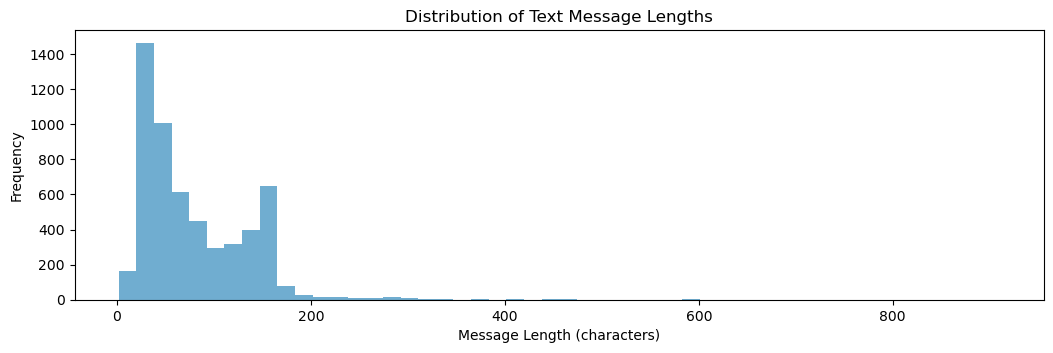

In [170]:
matplotlib is set up
%matplotlib inline

# Set figure size
plt.figure(figsize=(12.5, 3.5))

The length of each text message is stored in the 'values' column of the DataFrame 'df'.
message_lengths = df['values'].apply(len)

# distribution of length of messages
plt.hist(message_lengths, bins=50, color="#348ABD", alpha=0.7)
plt.xlabel("Message Length (characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Text Message Lengths")

# plot
plt.show()

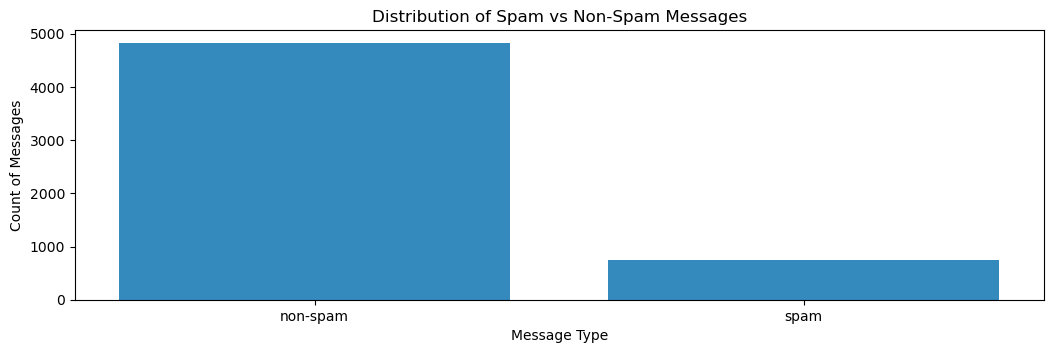

In [171]:
import matplotlib.pyplot as plt

# Calculate the number of spam and non-spam messages
message_counts = df['target'].value_counts()

# Set the size of the figure
plt.figure(figsize=(12.5, 3.5))

# Create a bar chart to visualize the distribution
plt.bar(message_counts.index, message_counts.values, color="#348ABD")
plt.xlabel("Message Type")
plt.ylabel("Count of Messages")
plt.title("Distribution of Spam vs Non-Spam Messages")

# Display the plot
plt.show()


In [172]:
# spam and not spam_values
df['target'].value_counts()

target
non-spam    4825
spam         747
Name: count, dtype: int64

In [173]:
from sklearn.preprocessing import LabelEncoder
X = df['values']  # Input_data 
Y = df['target']  # Target_variable 
le = LabelEncoder()
Y = le.fit_transform(Y)  # Transforming the categorical labels to numerical labels

In [174]:
#Split into training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.75)

In [175]:
# Define control and treatment groups using the test data
control_group_train = X_train[Y_train == 0]
treatment_group_train = X_train[Y_train == 1]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_control, p_treatment]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 41 seconds.


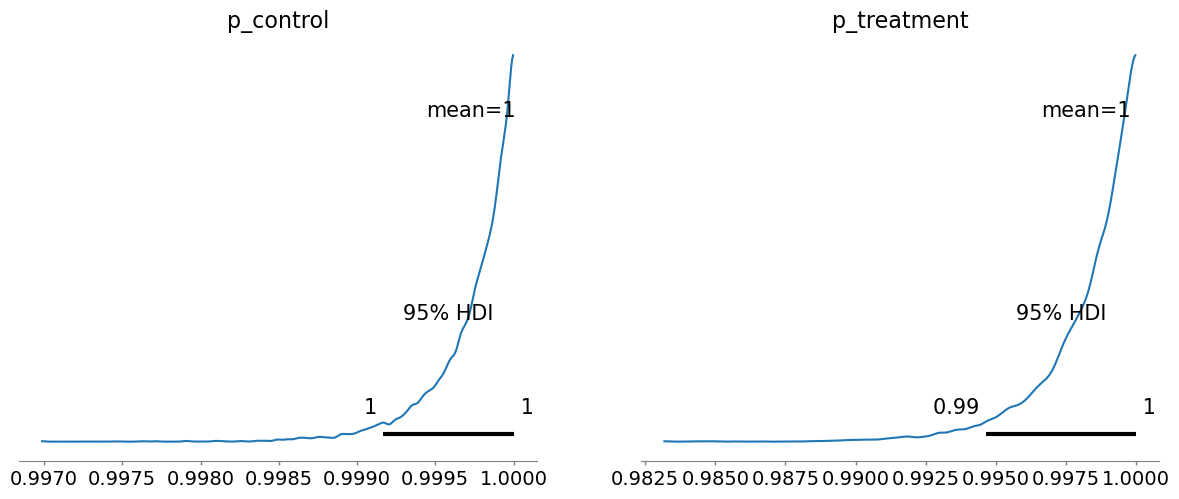

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
p_control    1.000  0.000   0.999      1.0        0.0      0.0    2876.0   
p_treatment  0.998  0.002   0.995      1.0        0.0      0.0    3583.0   

             ess_tail  r_hat  
p_control      1901.0    1.0  
p_treatment    2962.0    1.0  


In [176]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Convert message labels to numerical values and split the dataset
df['target'] = df['target'].replace({'non-spam': 0, 'spam': 1})
X_train, X_test, Y_train, Y_test = train_test_split(df['values'], df['target'], test_size=0.25, random_state=42)

# Calculate the number of samples in control and treatment groups
n_control = (Y_train == 0).sum()
n_treatment = (Y_train == 1).sum()

# model (Bayesian)
with pm.Model() as model:
    p_control = pm.Beta('p_control', alpha=1, beta=1)
    p_treatment = pm.Beta('p_treatment', alpha=1, beta=1)
    pm.Binomial('control_likelihood', n=len(Y_train[Y_train == 0]), p=p_control, observed=n_control)
    pm.Binomial('treatment_likelihood', n=len(Y_train[Y_train == 1]), p=p_treatment, observed=n_treatment)
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.95)

# Visualize posterior distributions and display summary statistics
pm.plot_posterior(trace, var_names=['p_control', 'p_treatment'], hdi_prob=0.95)
plt.show()
summary = pm.summary(trace, var_names=['p_control', 'p_treatment'])
print(summary)

Column Names: Index(['target', 'values'], dtype='object')
'target' and 'values' columns are present.
Type of values: <class 'numpy.ndarray'>
Shape of values: (1,)
Type of target: <class 'numpy.ndarray'>
Shape of target: (1,)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 94 seconds.
There were 610 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


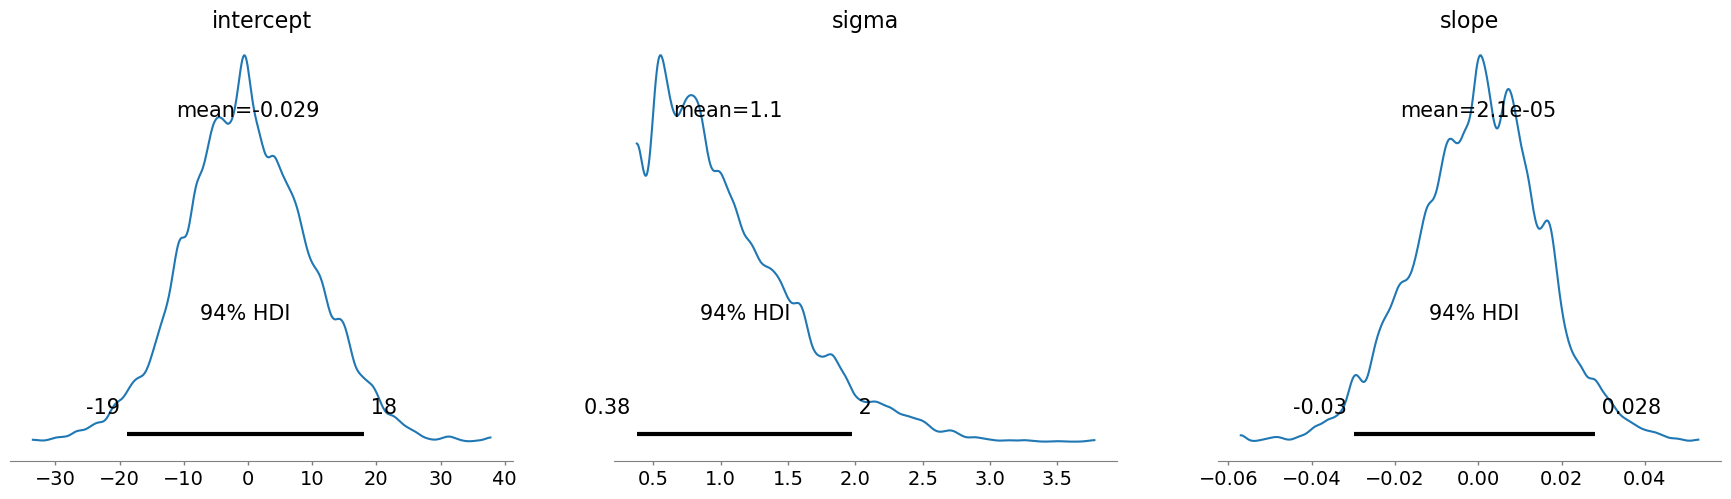

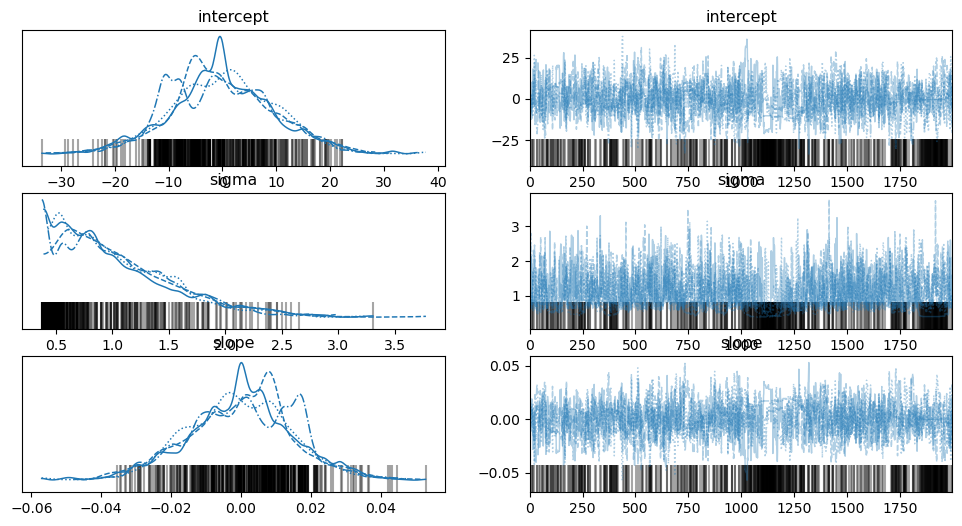

Sampling: [y_obs]


Output()

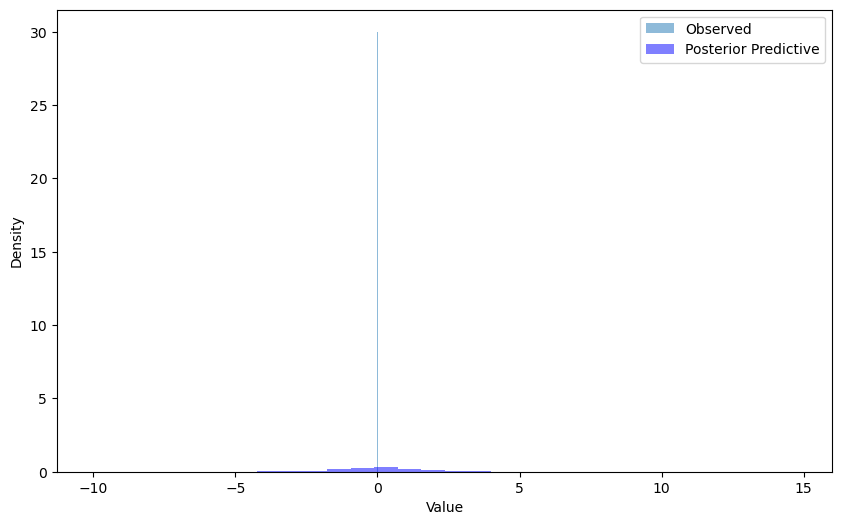

In [177]:
import matplotlib.pyplot as plt

# Verify column names
print("Column Names:", df.columns)

# Check presence of 'target' and 'values' columns
if 'target' in df.columns and 'values' in df.columns:
    print("'target' and 'values' columns are present.")
else:
    raise ValueError("Columns 'target' or 'values' are missing in the DataFrame.")

# Data cleaning: Convert non-numeric 'values' entries to NaN and drop them
df['values'] = pd.to_numeric(df['values'], errors='coerce')
df.dropna(subset=['values'], inplace=True)

# Convert to numpy arrays
values = df['values'].values.astype(float)  
target = df['target'].values.astype(float)  

# Print types and shapes
print("Type of values:", type(values))
print("Shape of values:", values.shape)
print("Type of target:", type(target))
print("Shape of target:", target.shape)

# Model(Bayesian Linear Regression Model)

with pm.Model() as linear_model:
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    slope = pm.Normal('slope', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    # Define linear model 
    mu = intercept + slope * values
    
    # Likelihood of observations
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=target)
    
    # Sample from posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot posterior distributions
pm.plot_posterior(trace)
plt.show()

# Plot trace
pm.plot_trace(trace)
plt.show()

# Print summary statistics
summary = pm.summary(trace)
print(summary)

# Posterior predictive check
with linear_model:
    posterior_predictive = pm.sample_posterior_predictive(trace)

# Get simulated values of y_obs
y_ppc = posterior_predictive.posterior_predictive['y_obs']

# Plot observed vs. posterior predictive
plt.figure(figsize=(10, 6))
plt.hist(target, bins=30, alpha=0.5, label='Observed', density=True)
plt.hist(y_ppc.values.flatten(), bins=30, alpha=0.5, color='b', label='Posterior Predictive', density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()